<font color="#CA3532"><h1 align="left">Máster en Big Data y Data Science - Fundamentos de Análisis de Datos</h1></font>
<font color="#6E6E6E"><h2 align="left">Correlación e Información Mutua entre una variable numérica y otra categórica</h2></font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

BOLD = '\033[1m'
NO_BOLD = '\033[0m'

%matplotlib inline

In [2]:
# here the import csv file as a pandas dataframe
df = pd.read_csv("./adult_dataset.csv")

In [3]:
df.shape

(32561, 15)

In [4]:
# nos quedamos solo con un subconjunto de 3000 casos para reducir la carga computacional

np.random.seed(1)
df = df.loc[np.random.permutation(len(df))[:3000]]
df.reset_index(inplace=True, drop=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K
1,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K
2,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K
3,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
4,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
yearly-income     0
dtype: int64

In [6]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
count,3000.000000,3000,3000.000000,3000,3000.000000,3000,3000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000,3000
unique,NaN,8,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,2133,NaN,976,NaN,1351,376,1192,2540,1989,NaN,NaN,NaN,2695,2329
mean,38.470333,NaN,188949.420333,NaN,10.099000,NaN,NaN,NaN,NaN,NaN,1143.824333,83.285667,40.372667,NaN,NaN
std,13.656523,NaN,101909.173008,NaN,2.522694,NaN,NaN,NaN,NaN,NaN,8053.092177,393.061403,12.364199,NaN,NaN
min,17.000000,NaN,19302.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,27.000000,NaN,120156.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,178319.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,234962.000000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


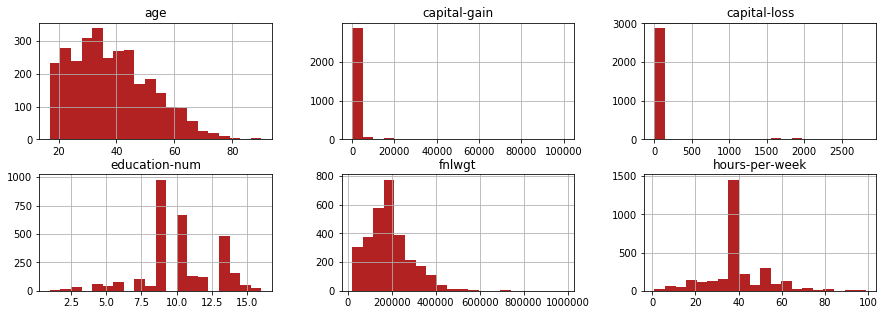

In [7]:
df.hist(color='firebrick', bins=20, layout=(11,3), figsize=(15,30));

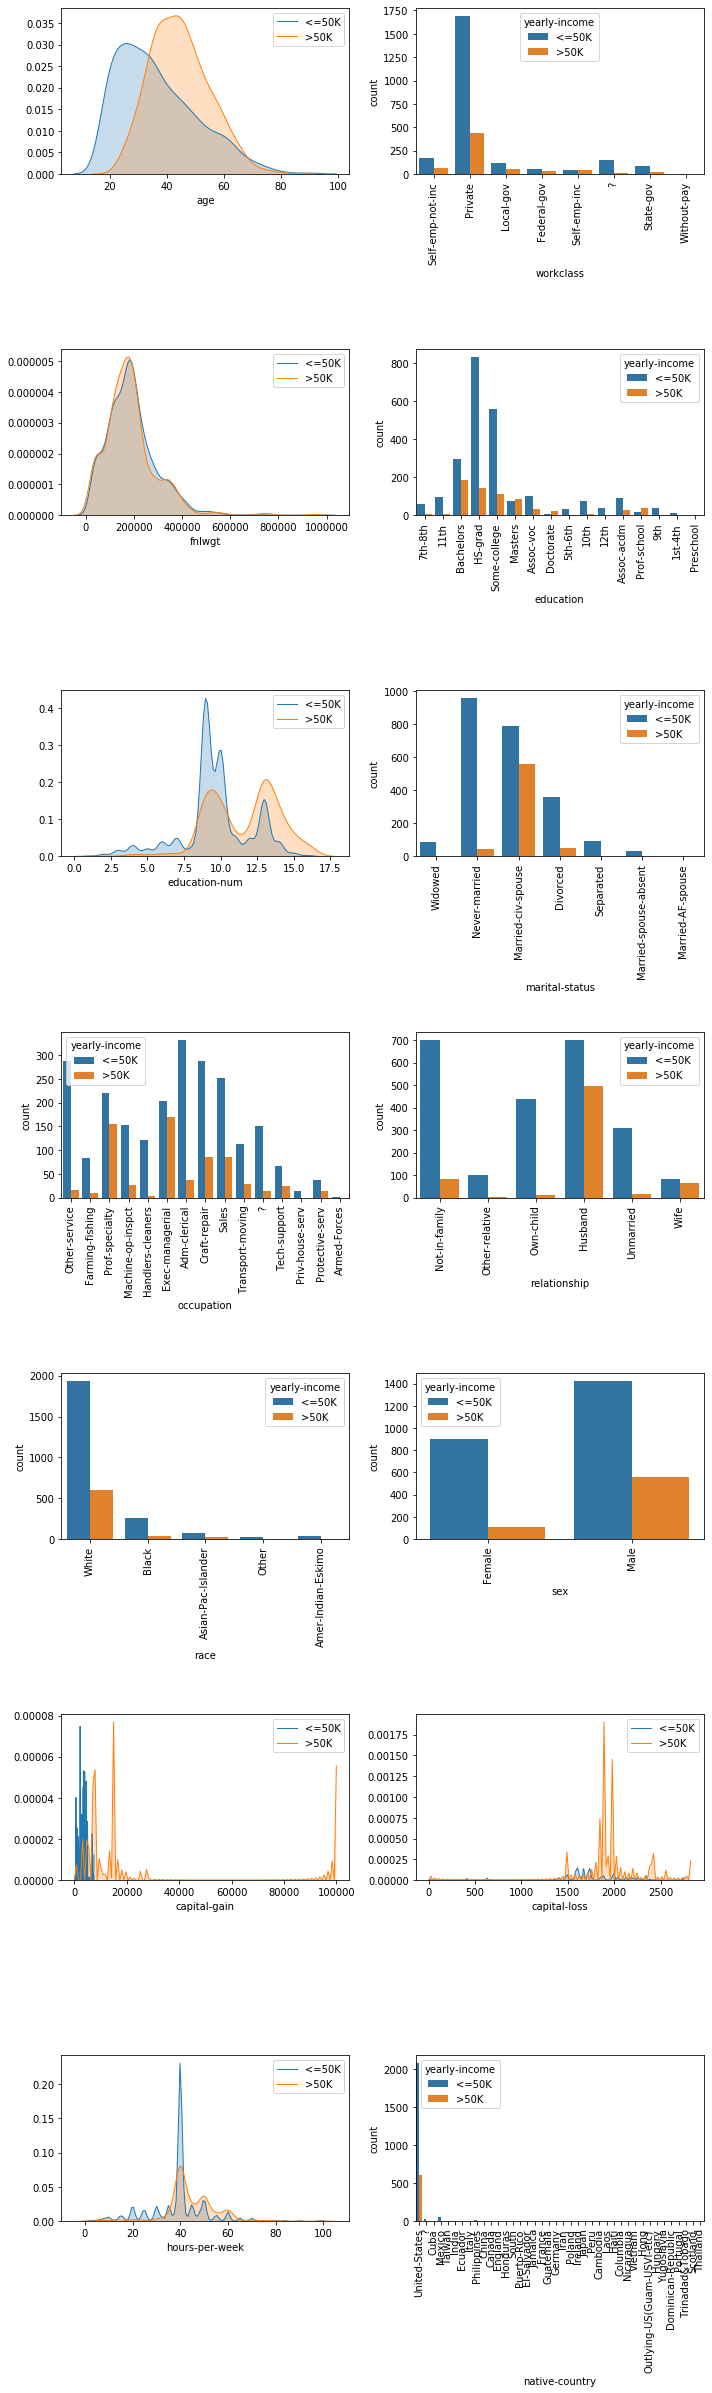

In [8]:
clases = np.unique(df["yearly-income"])
cols = list(df.columns)
cols.remove("yearly-income")

plt.figure(figsize=(10,50))

for i,col in enumerate(cols):
    plt.subplot(11,2,i+1)
    if len(np.unique(df[col]))<=2 or df.dtypes[col] == object:
        sns.countplot(x=col, hue="yearly-income", data=df)
        plt.xticks(rotation=90)
#        plt.subplots_adjust(wspace=1.5)
    else:
        for c in clases:
            pass
            sns.distplot(df[df["yearly-income"]==c][col], hist=False, kde=True,
                         kde_kws = {'shade': True, 'linewidth': 1}, 
                         label = c)
plt.tight_layout()

## Recodificación de variables categóricas

Primera opción: una variable categórica con M categorías -> una variable entera con valores de 0 a M-1
    
Esta codificación no es correcta si M>2 ya que implícitamente introduce un ordenamiento de y unas distancias diferentes entre los valores.

In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
yearly-income     object
dtype: object

In [10]:
maritalStatus_num, num2maritalStatus = df["marital-status"].factorize()
print(df["marital-status"].head(5))
print()
print(maritalStatus_num[:5])
print()
print(num2maritalStatus)

0               Widowed
1         Never-married
2         Never-married
3    Married-civ-spouse
4         Never-married
Name: marital-status, dtype: object

[0 1 1 2 1]

Index(['Widowed', 'Never-married', 'Married-civ-spouse', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype='object')


In [11]:
df_factorized = df.copy()

for i,col in enumerate(cols):
    if df_factorized.dtypes[col] == object:
        df_factorized.loc[:,col] = df_factorized.loc[:,col].factorize()[0]

df_factorized.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,62,0,26911,0,4,0,0,0,0,0,0,0,66,0,<=50K
1,18,1,208103,1,7,1,0,1,0,1,0,0,25,0,<=50K
2,25,1,102476,2,13,1,1,2,0,1,27828,0,50,0,>50K
3,33,1,511517,3,9,2,2,3,0,1,0,0,40,0,<=50K
4,36,1,292570,1,7,1,3,4,0,0,0,0,40,0,<=50K


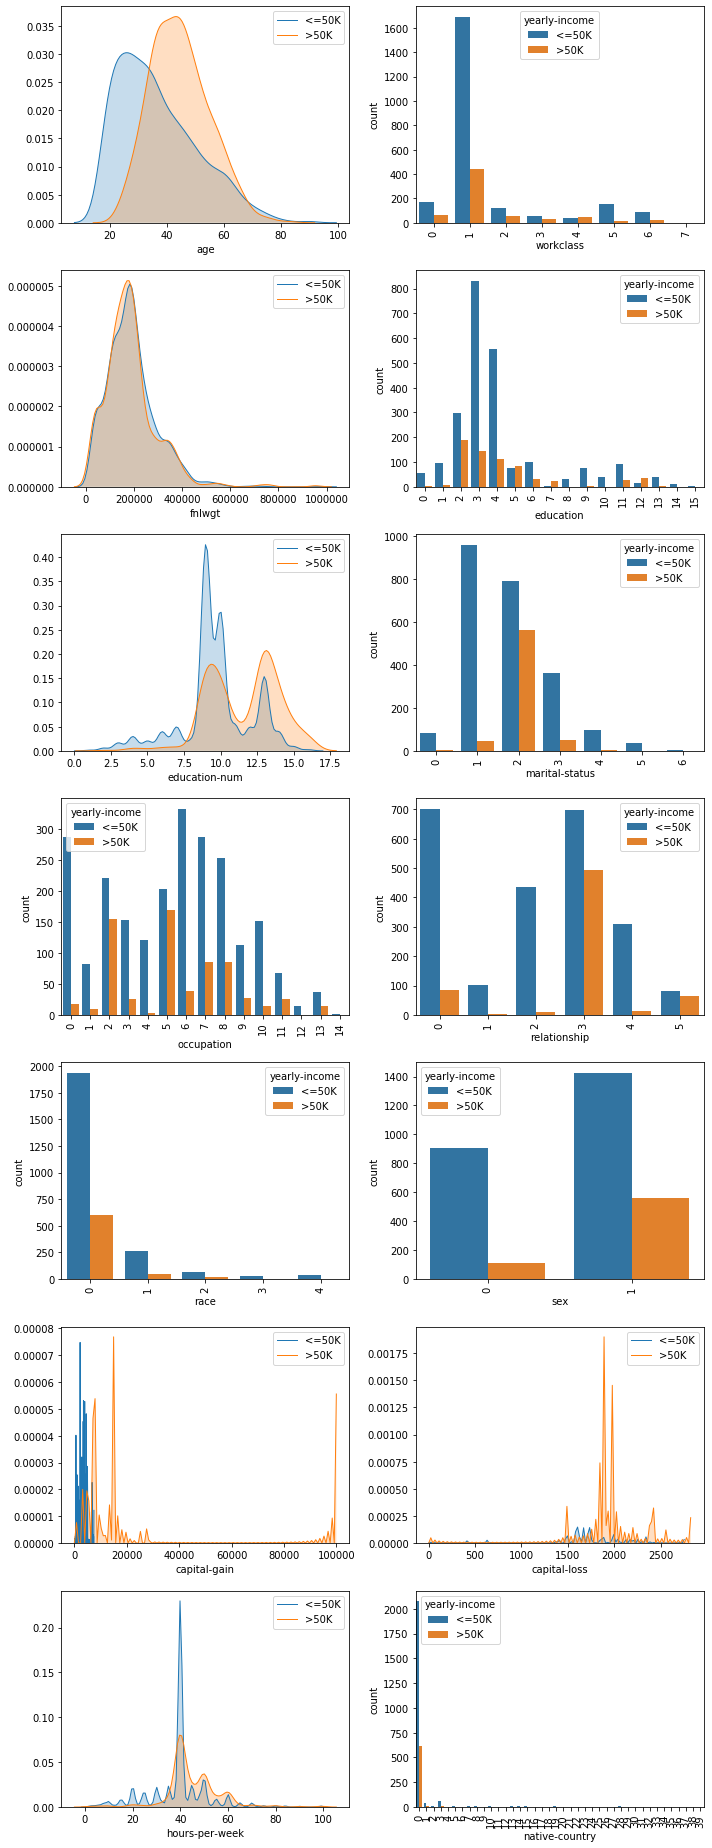

In [12]:
clases = np.unique(df_factorized["yearly-income"])

plt.figure(figsize=(10,40))

for i,col in enumerate(cols):
    plt.subplot(11,2,i+1)
    if len(np.unique(df_factorized[col]))<=2 or df.dtypes[col] == object:
        sns.countplot(x=col, hue="yearly-income", data=df_factorized)
        plt.xticks(rotation=90)
    else:
        for c in clases:
            sns.distplot(df_factorized[df_factorized["yearly-income"]==c][col],
                         hist=False, kde=True,
                         kde_kws = {'shade': True, 'linewidth': 1}, 
                         label = c)
plt.tight_layout()

In [13]:
categoricas = ["workclass", "education", "marital-status",
               "occupation", "relationship", "race",
               "sex", "native-country"]

### Información mutua:

In [14]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score

for col in cols:
    if col in categoricas:
        mutual_info = mutual_info_score(df_factorized[col],
                                        df_factorized["yearly-income"])
    else:
        mutual_info = mutual_info_classif(df_factorized[[col]],
                                          df_factorized["yearly-income"])[0]
    print(BOLD+"MI("+col+",target):"+NO_BOLD, np.round(mutual_info,4))

MI(age,target): 0.0652
MI(workclass,target): 0.0131
MI(fnlwgt,target): 0.0023
MI(education,target): 0.0622
MI(education-num,target): 0.0507
MI(marital-status,target): 0.0968
MI(occupation,target): 0.0596
MI(relationship,target): 0.0979
MI(race,target): 0.0051
MI(sex,target): 0.022
MI(capital-gain,target): 0.079
MI(capital-loss,target): 0.0221
MI(hours-per-week,target): 0.0356
MI(native-country,target): 0.0075


#### Correlación:

In [15]:
df_factorized["yearly-income>50K"] = 1*(df_factorized["yearly-income"]==" >50K")
df_factorized.corr().iloc[:-1, -1:]

,yearly-income>50K
age,NaN
workclass,NaN
fnlwgt,NaN
education,NaN
education-num,NaN
marital-status,NaN
occupation,NaN
relationship,NaN
race,NaN
sex,NaN


## Recodificación de variables categóricas.

¿Cómo codificarlas para que no haya sesgo?
Ejercicio: Repetir análisis anterior con esta codificación